In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
C:\Users\kevin\AppData\Local\Temp\ipykernel_11064\3048493199.py:23: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(data['ColNum'] - (len(data['ColNum']) + 1) / 2, gaussian(data['ColNum'] - (len(data['ColNum']) + 1) / 2, *popt), alpha = 1, color='red', label='$\mu:${:.3f} $\sigma:${:.3f}'.format(popt[0], popt[1]))


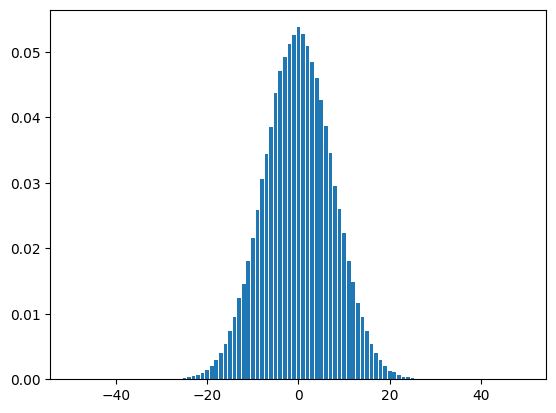

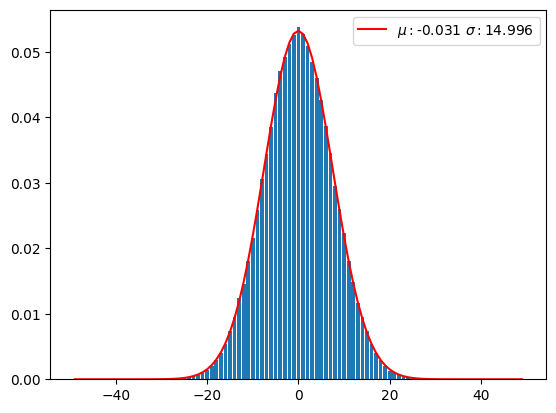

In [72]:
# Read the data from the txt file
def read_data(file_path):
    data = pd.read_csv(file_path, sep='\t', header=None)
    
    # Rename the columns
    data.columns = ['ColNum', 'Value']
    return data

def normalize_data(data):
    data['Value'] = data['Value'] / data['Value'].sum()
    return data

def plot_data(data):
    plt.bar(data['ColNum'] - (len(data['ColNum']) + 1) / 2, data['Value'], alpha = 1)
    plt.show()

def gaussian(x, mu, sigma):
    return 1 / (np.sqrt(0.5 * np.pi * sigma**2)) * np.exp(- (x - mu)**2 / (0.5 * sigma**2))

def plot_curve_gaussian_data(data):
    popt, pcov = curve_fit(gaussian, data['ColNum'] - (len(data['ColNum']) + 1) / 2, data['Value'], p0 = [0, 1])
    plt.bar(data['ColNum'] - (len(data['ColNum']) + 1) / 2, data['Value'], alpha = 1)
    plt.plot(data['ColNum'] - (len(data['ColNum']) + 1) / 2, gaussian(data['ColNum'] - (len(data['ColNum']) + 1) / 2, *popt), alpha = 1, color='red', label='$\mu:${:.3f} $\sigma:${:.3f}'.format(popt[0], popt[1]))
    plt.legend()
    plt.show()

for i in range(0, 1):
    path = f'./histogram-{i}.csv'
    datos = read_data(path)
    datos = normalize_data(datos)
    plot_data(datos)
    plot_curve_gaussian_data(datos)